# EN3160 Assignment 03: Neural Networks

- Name: A.A.W.L.R.Amarasinghe
- Index No.: 210031H

# Question 1

# Original Code

This code implements a linear classifier to classify images from the CIFAR-10 dataset using PyTorch. It initializes weights and biases as model parameters and uses a training loop with stochastic gradient descent (SGD) to update the parameters. The training process runs for several epochs, adjusting the learning rate with each iteration. It plots the loss history over epochs to visualize the training progress. Finally, it calculates and prints both training and test accuracies for the model.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 1.9638
Epoch 2/10, Loss: 1.8480
Epoch 3/10, Loss: 1.8163
Epoch 4/10, Loss: 1.7986
Epoch 5/10, Loss: 1.7867
Epoch 6/10, Loss: 1.7778
Epoch 7/10, Loss: 1.7710
Epoch 8/10, Loss: 1.7655
Epoch 9/10, Loss: 1.7610
Epoch 10/10, Loss: 1.7572


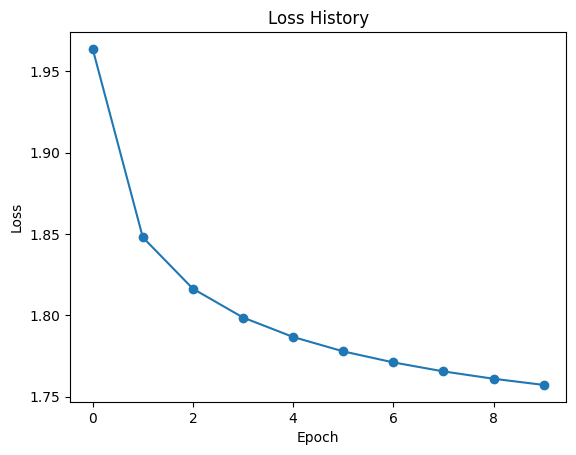

Training accuracy: 40.95%
Test accuracy: 40.10%


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # 1. Dataloading
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ]
    )
    batch_size = 50
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # Model parameters
    Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
    K = 10  # Output size (number of classes in CIFAR-10)
    std = 1e-5

    # Initialize weights and biases with gradient tracking
    w = nn.Parameter(torch.randn(Din, K) * std)  # One layer: directly map input to output
    b = nn.Parameter(torch.zeros(K))

    # Hyperparameters
    iterations = 10
    lr = 1e-3  # Increased learning rate
    lr_decay = 0.9  # Learning rate decay
    reg = 0  # Regularization
    loss_history = []

    # 3. Training Loop
    for t in range(iterations):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # Get inputs and labels
            inputs, labels = data
            Ntr = inputs.shape[0]  # Batch size
            x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
            
            # Forward pass
            y_pred = x_train.mm(w) + b  # Output layer activation
            
            # Loss calculation (Cross-Entropy Loss with regularization)
            loss = nn.CrossEntropyLoss()(y_pred, labels) + reg * torch.sum(w ** 2)
            running_loss += loss.item()
            
            # Backpropagation
            loss.backward()
            with torch.no_grad():
                # Parameter update
                w -= lr * w.grad
                b -= lr * b.grad
                # Zero gradients after each update
                w.grad.zero_()
                b.grad.zero_()

        # Print loss for every epoch
        avg_epoch_loss = running_loss / len(trainloader)
        loss_history.append(avg_epoch_loss)
        print(f"Epoch {t + 1}/{iterations}, Loss: {avg_epoch_loss:.4f}")

        # Learning rate decay
        lr *= lr_decay

    # 4. Plotting the Loss History
    plt.plot(loss_history, marker='o')
    plt.title("Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # 5. Calculate Accuracy on Training Set
    correct_train = 0
    total_train = 0
    with torch.no_grad():
        for data in trainloader:
            inputs, labels = data
            Ntr = inputs.shape[0]
            x_train = inputs.view(Ntr, -1)
            y_train_pred = x_train.mm(w) + b
            predicted_train = torch.argmax(y_train_pred, dim=1)
            total_train += labels.size(0)
            correct_train += (predicted_train == labels).sum().item()

    train_acc = 100 * correct_train / total_train
    print(f"Training accuracy: {train_acc:.2f}%")

    # 6. Calculate Accuracy on Test Set
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            Nte = inputs.shape[0]
            x_test = inputs.view(Nte, -1)
            y_test_pred = x_test.mm(w) + b
            predicted_test = torch.argmax(y_test_pred, dim=1)
            total_test += labels.size(0)
            correct_test += (predicted_test == labels).sum().item()

    test_acc = 100 * correct_test / total_test
    print(f"Test accuracy: {test_acc:.2f}%")


# Adding a middle layer with 100 nodes and a sigmoid activation.

This code improves the original code by adding a hidden layer to the model, making it a two-layer neural network instead of a simple linear classifier. It uses the nn.Sigmoid activation function between layers to introduce non-linearity, enabling the model to learn more complex patterns. The SGD optimizer is used with L2 regularization (weight_decay) to reduce overfitting. Additionally, the code uses the nn.CrossEntropyLoss directly with the model's output, and gradients are managed using optimizer.zero_grad(), simplifying the training process. These changes significantly enhance the model's expressiveness and potential accuracy.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.0840
Epoch 2/10, Loss: 1.9108
Epoch 3/10, Loss: 1.8473
Epoch 4/10, Loss: 1.8088
Epoch 5/10, Loss: 1.7806
Epoch 6/10, Loss: 1.7586
Epoch 7/10, Loss: 1.7410
Epoch 8/10, Loss: 1.7259
Epoch 9/10, Loss: 1.7126
Epoch 10/10, Loss: 1.7008


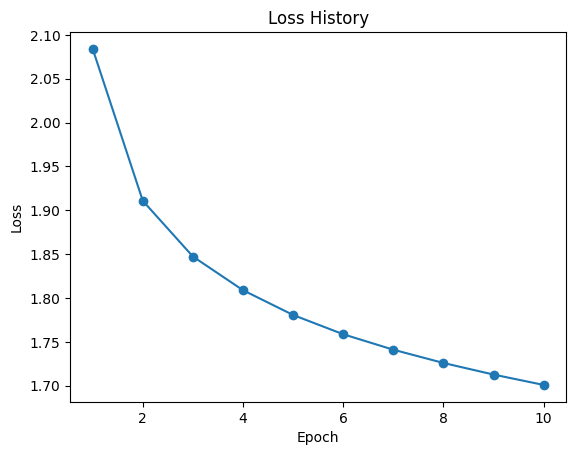

Training Accuracy: 41.53%
Test Accuracy: 40.97%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # 1. Dataloading
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ]
    )
    batch_size = 50
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 2. Define Network Architecture with Hidden Layer
    class SimpleNet(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(SimpleNet, self).__init__()
            # Define layers
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.sigmoid = nn.Sigmoid()
            self.fc2 = nn.Linear(hidden_size, output_size)
        
        def forward(self, x):
            x = x.view(x.size(0), -1)  # Flatten input
            x = self.fc1(x)  # First layer
            x = self.sigmoid(x)  # Sigmoid activation
            x = self.fc2(x)  # Output layer
            return x

    # Model parameters
    input_size = 3 * 32 * 32  # CIFAR-10 image size (flattened)
    hidden_size = 100  # Hidden layer size
    output_size = 10  # Number of classes

    # Instantiate model, loss function, and optimizer
    model = SimpleNet(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.0005)  # Weight decay for L2 regularization

    # 3. Training Loop
    num_epochs = 10
    loss_history = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            # Zero gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            # Accumulate loss
            running_loss += loss.item()

        # Average loss for the epoch
        epoch_loss = running_loss / len(trainloader)
        loss_history.append(epoch_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # 4. Plotting the Loss History
    plt.plot(range(1, num_epochs + 1), loss_history, marker='o')
    plt.title("Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # 5. Calculate Training Accuracy
    correct_train = 0
    total_train = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
    train_acc = 100 * correct_train / total_train
    print(f"Training Accuracy: {train_acc:.2f}%")
    
    # 6. Calculate Test Accuracy
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_acc = 100 * correct_test / total_test
    print(f"Test Accuracy: {test_acc:.2f}%")


Both the test and training accuracies have improved due to the addition of the middle layer of neurons.

# Question 2

# LeNet-5 network for MNIST

The LeNet-5 network architecture is adapted for the MNIST dataset, handling single-channel grayscale images. The architecture consists of two convolutional layers, two average pooling layers, and three fully connected layers, making it effective for classifying handwritten digits.

- Convolutional Layers: The network includes two convolutional layers. The first convolutional layer has 6 filters of size 5×5 and the second has 16 filters of the same size. These layers use ReLU activations.

- Average Pooling Layers: Each convolutional layer is followed by an average pooling layer with a 2×2 kernel.

- Fully Connected Layers: The network has three fully connected layers with 120, 84, and 10 output nodes, respectively. The last layer outputs a 10-dimensional vector for the 10 classes of handwritten digits (0-9).

- Cross-Entropy Loss: This loss function measures the difference between the predicted and true class probabilities.

- Adam Optimizer: The Adam optimizer is used to adjust the network’s weights efficiently. This leads to faster and more stable convergence.

- 10 Epochs: The model is trained over exactly 10 epochs.

Epoch 1/10: Loss: 0.3826
Epoch 2/10: Loss: 0.0843
Epoch 3/10: Loss: 0.0566
Epoch 4/10: Loss: 0.0428
Epoch 5/10: Loss: 0.0334
Epoch 6/10: Loss: 0.0282
Epoch 7/10: Loss: 0.0241
Epoch 8/10: Loss: 0.0205
Epoch 9/10: Loss: 0.0184
Epoch 10/10: Loss: 0.0146
Training Accuracy: 99.51 %
Test Accuracy : 98.78%


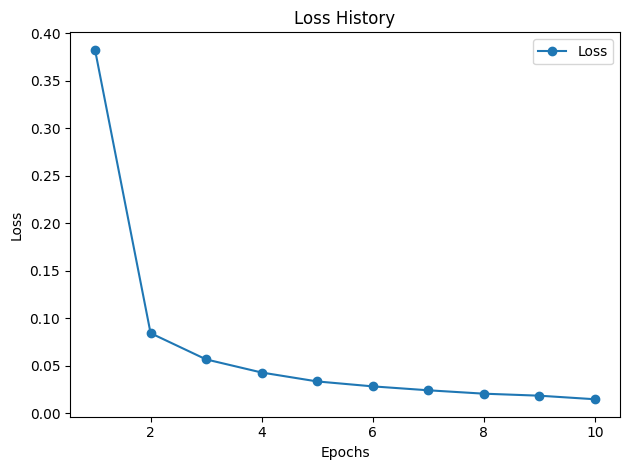

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)     # Input channels: 1, Output channels: 6
        self.pool = nn.AvgPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)    # Input channels: 6, Output channels: 16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)           # Adjust input features based on image size
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)                    # 10 classes for MNIST

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))        # Layer 1
        x = self.pool(torch.relu(self.conv2(x)))        # Layer 2
        x = x.view(-1, 16 * 5 * 5)                      # Flatten
        x = torch.relu(self.fc1(x))                     # Layer 3
        x = torch.relu(self.fc2(x))                     # Layer 4
        x = self.fc3(x)                                 # Output layer
        return x

# Transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),                        # LeNet-5 expects 32x32 images
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))          # Normalize with MNIST mean and std
])

# Load MNIST Dataset
train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('.', train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Initialize Model, Loss Function, Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training Loop
iterations = 10
train_accuracies = []
train_losses = []
for epoch in range(1, 11):
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch {epoch}/{iterations}: Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_accuracy:.2f} %')

# Testing Loop
test_accuracies = []
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

test_accuracy = 100 * correct / total
test_accuracies.append(test_accuracy)
print(f'Test Accuracy : {test_accuracy:.2f}%')

# Plot accuracy and loss with epochs
epochs = list(range(1, 11))

# Plot Training Loss
plt.plot(epochs, train_losses, label='Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()

plt.tight_layout()
plt.show()


# Question 3

# ResNet18 Finetuning

Download complete!
Extracting dataset...
Extraction complete!


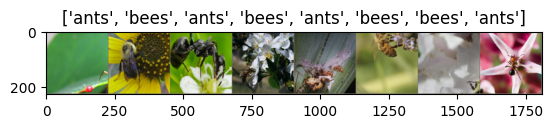

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import urllib.request
import zipfile

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the URL and download location
url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
filename = "hymenoptera_data.zip"

# Download the file
print("Downloading dataset...")
urllib.request.urlretrieve(url, filename)
print("Download complete!")

# Extract the zip file
extract_dir = "./hymenoptera_data"

print("Extracting dataset...")
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("Extraction complete!")

# Clean up
os.remove(filename)  # Optional: remove the zip file after extraction

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './hymenoptera_data/hymenoptera_data'  # Correct the path to the hymenoptera dataset
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ['train', 'val']
}
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8, shuffle=True, num_workers=4)
    for x in ['train', 'val']
}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [8]:
# Load the pre-trained ResNet-18 model
resnet18 = models.resnet18(pretrained=True)
resnet18 = resnet18.to(device)

# Define a function for training the model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass + optimize only in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

# visualize_model
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

## Finetuning the ConvNet

Objective: In fine-tuning, we slightly modify the pre-trained network to adapt it to our specific task. This involves updating the weights of the entire model so that it learns features relevant to the Hymenoptera dataset, while still benefiting from its prior training on ImageNet.

Fine-tuning the pre-trained model
Epoch 0/9
----------
train Loss: 0.5416 Acc: 0.6721
val Loss: 0.3438 Acc: 0.8431

Epoch 1/9
----------
train Loss: 0.3174 Acc: 0.8770
val Loss: 0.1730 Acc: 0.9477

Epoch 2/9
----------
train Loss: 0.2118 Acc: 0.9180
val Loss: 0.2048 Acc: 0.9281

Epoch 3/9
----------
train Loss: 0.2478 Acc: 0.8934
val Loss: 0.2411 Acc: 0.9216

Epoch 4/9
----------
train Loss: 0.2657 Acc: 0.8852
val Loss: 0.2037 Acc: 0.9542

Epoch 5/9
----------
train Loss: 0.2736 Acc: 0.8975
val Loss: 0.2074 Acc: 0.9412

Epoch 6/9
----------
train Loss: 0.2345 Acc: 0.8852
val Loss: 0.2015 Acc: 0.9542

Epoch 7/9
----------
train Loss: 0.3019 Acc: 0.8975
val Loss: 0.1675 Acc: 0.9608

Epoch 8/9
----------
train Loss: 0.1864 Acc: 0.9344
val Loss: 0.1712 Acc: 0.9542

Epoch 9/9
----------
train Loss: 0.1488 Acc: 0.9262
val Loss: 0.1695 Acc: 0.9608

Training complete in 5m 37s
Best val Acc: 0.960784


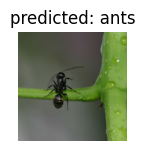

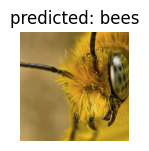

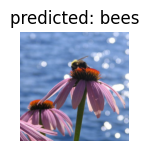

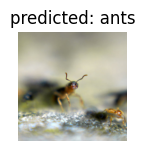

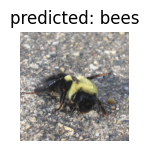

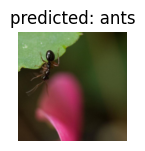

In [9]:
# (a) Fine-tuning the pre-trained model
print("Fine-tuning the pre-trained model")
# Modify the final layer to match the number of classes in our dataset
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, len(class_names))
resnet18 = resnet18.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# Train and evaluate the model
resnet18 = train_model(resnet18, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

# Visualize the model predictions
visualize_model(resnet18)

## ConvNet as fixed feature extractor

Objective: In this approach, the pre-trained ResNet-18 model serves as a fixed feature extractor, meaning only the last fully connected layer is trained.This prevents any weight updates in these layers, so they act solely as a feature extractor.


Using the pre-trained model as a feature extractor
Epoch 0/9
----------
train Loss: 0.5689 Acc: 0.6803
val Loss: 0.2950 Acc: 0.9085

Epoch 1/9
----------
train Loss: 0.4037 Acc: 0.8320
val Loss: 0.3023 Acc: 0.8758

Epoch 2/9
----------
train Loss: 0.3011 Acc: 0.8852
val Loss: 0.1808 Acc: 0.9412

Epoch 3/9
----------
train Loss: 0.2823 Acc: 0.8975
val Loss: 0.1735 Acc: 0.9412

Epoch 4/9
----------
train Loss: 0.2701 Acc: 0.8852
val Loss: 0.1718 Acc: 0.9542

Epoch 5/9
----------
train Loss: 0.2674 Acc: 0.8730
val Loss: 0.1918 Acc: 0.9412

Epoch 6/9
----------
train Loss: 0.3586 Acc: 0.8525
val Loss: 0.1604 Acc: 0.9477

Epoch 7/9
----------
train Loss: 0.1889 Acc: 0.9098
val Loss: 0.1585 Acc: 0.9542

Epoch 8/9
----------
train Loss: 0.2255 Acc: 0.9057
val Loss: 0.1613 Acc: 0.9477

Epoch 9/9
----------
train Loss: 0.2409 Acc: 0.8770
val Loss: 0.1565 Acc: 0.9542

Training complete in 3m 29s
Best val Acc: 0.954248


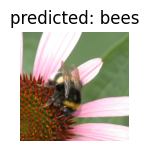

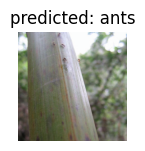

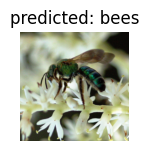

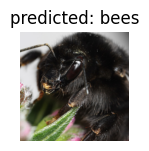

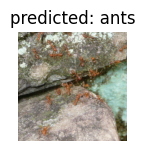

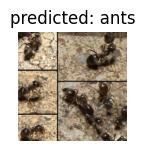

In [10]:
# (b) Using the pre-trained model as a feature extractor
print("\nUsing the pre-trained model as a feature extractor")
resnet18 = models.resnet18(pretrained=True)
# Freeze all the network except the final layer
for param in resnet18.parameters():
    param.requires_grad = False

# Modify the final layer to match the number of classes in our dataset
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, len(class_names))
resnet18 = resnet18.to(device)

criterion = nn.CrossEntropyLoss()
# Only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(resnet18.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

# Train and evaluate the model
resnet18 = train_model(resnet18, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)

# Visualize the model predictions
visualize_model(resnet18)

## Interpretation of Results

- Validation accuracy of fine-tuning model - 96.08%
- Validation accuracy of the fixed feature extractor - 95.42%

The feature extraction approach, which freezes the earlier layers of ResNet18 and only trains the final fully connected layer, performed slightly worse than the fine-tuning approach. This result suggests that the pre-trained ResNet18 model's feature representations, learned from the ImageNet1K dataset, are highly generalizable to the hymenoptera dataset (bees and ants classification).

Fine-tuning all layers typically allows the model to adapt more specifically to the new dataset, and in this case, it performed better than the fixed feature extractor in accuracy. However, fine-tuning can sometimes lead to overfitting, especially when the new dataset is small or similar to the original training data.
